<a href="https://colab.research.google.com/github/Nekokan1500/Machine-Learning/blob/main/Deep_Learning/Example_Classification_and_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import imdb
from tensorflow.keras.datasets import reuters
from tensorflow.keras.utils import to_categorical

In [ ]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


In [ ]:
print(train_data.shape)
print(train_labels.shape)
print(len(train_data[0]))
print(train_data[0])
print(train_labels[0])

(25000,)
(25000,)
218
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


In [ ]:
# Decoding reviews back to text
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join([reverse_word_index.get(i-3, "?") for i in train_data[0]])
print(decoded_review)

1654784/1641221 [==============================] - 0s 0us/step
? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amaz

In [3]:
# Data preparation
# Encoding the integer sequences via multi-hot encoding
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i, j] = 1.  # dedup also happens here
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
# Make a copy of the train/test_labels array and change data type w/o affecting 
# the original data
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [ ]:
# Model definition
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
# Setting aside a validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
# Training the model
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history

Epoch 1/20
30/30 [==============================] - 2s 39ms/step - loss: 0.5244 - accuracy: 0.7835 - val_loss: 0.4165 - val_accuracy: 0.8408
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3181 - accuracy: 0.8967 - val_loss: 0.3160 - val_accuracy: 0.8829
Epoch 3/20
30/30 [==============================] - 1s 27ms/step - loss: 0.2313 - accuracy: 0.9255 - val_loss: 0.3001 - val_accuracy: 0.8813
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1814 - accuracy: 0.9411 - val_loss: 0.3000 - val_accuracy: 0.8796
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1481 - accuracy: 0.9533 - val_loss: 0.2782 - val_accuracy: 0.8896
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1216 - accuracy: 0.9621 - val_loss: 0.2897 - val_accuracy: 0.8872
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - loss: 0.0982 - accuracy: 0.9713 - val_loss: 0.3073 - val_accuracy: 0.8835
Epoch 8/20
30

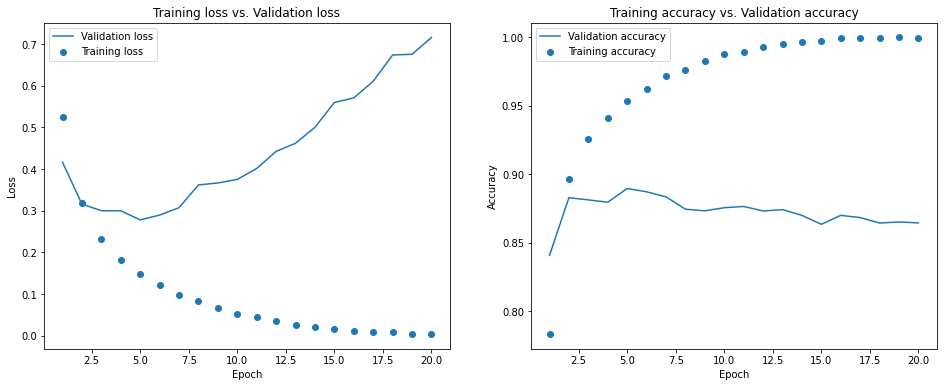

In [ ]:
# Plotting loss and accuracy of training data and validation data, respectively
fig, axs = plt.subplots(1,2,figsize=(16,6))
epochs = np.arange(1, 21, 1)
accuracies = history_dict['accuracy']
losses = history_dict['loss']
val_accuracies = history_dict['val_accuracy']
val_losses = history_dict['val_loss']
axs[0].scatter(epochs, losses, label='Training loss')
axs[0].plot(epochs, val_losses, label='Validation loss')
axs[0].set_title('Training loss vs. Validation loss')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].legend()
axs[1].scatter(epochs, accuracies, label='Training accuracy')
axs[1].plot(epochs, val_accuracies, label='Validation accuracy')
axs[1].set_title('Training accuracy vs. Validation accuracy')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy')
axs[1].legend()
fig.show()

In [ ]:
# From the above results, validation loss/accuracy is the lowest/highest at epoch 5
# Re-train model with 5 epochs
model.fit(x_train, y_train, epochs=5, batch_size=512)
results = model.evaluate(x_test, y_test)
print(results)

Epoch 1/5
49/49 [==============================] - 1s 14ms/step - loss: 0.2234 - accuracy: 0.9462
Epoch 2/5
49/49 [==============================] - 1s 13ms/step - loss: 0.1345 - accuracy: 0.9605
Epoch 3/5
49/49 [==============================] - 1s 13ms/step - loss: 0.1062 - accuracy: 0.9686
Epoch 4/5
49/49 [==============================] - 1s 14ms/step - loss: 0.0838 - accuracy: 0.9747
Epoch 5/5
782/782 [==============================] - 3s 4ms/step - loss: 0.5100 - accuracy: 0.8597
[0.5100052952766418, 0.85971999168396]


In [ ]:
# Calcuate predicted probabilities for the test data
model.predict(x_test)

array([[0.01897593],
       [0.9999981 ],
       [0.974099  ],
       ...,
       [0.1167893 ],
       [0.09331968],
       [0.92191106]], dtype=float32)

In [4]:
# Example of multiclass-single label classification problem
# Load the Reuters newswire dataset
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
print(len(train_data))
print(len(test_data))
print(train_data[10])

word_index = reuters.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)
decoded_newswire = " ".join([reverse_word_index.get(i-3, "?") for i in train_data[10]])
print(decoded_newswire)

# The label associated with an example is an integer between 0 and 45 (topic index)
print(train_labels[10])

8982
2246
[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]
? period ended december 31 shr profit 11 cts vs loss 24 cts net profit 224 271 vs loss 511 349 revs 7 258 688 vs 7 200 349 reuter 3
3


In [5]:
# Data preparation
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [6]:
# One-Hot encoding of target labels (46)
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1
  return results

In [9]:
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)
# Built-in way of doing one-hot encoding
# y_train = to_categorical(train_labels)
# y_test = to_categorical(test)

In [14]:
# Model definition
model = keras.Sequential(
    [layers.Dense(64, activation="relu"),
     layers.Dense(64, activation="relu"),
     layers.Dense(46, activation="Softmax")]
)

model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])
# if casting y_train and y_test to integer tensors, like
# y_train = np.array(train_labels)
# y_test = np.array(test_labels)
# Then the loss function should use "sparse_categorical_crossentropy"

In [15]:
# Setting aside validation dataset
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [16]:
# Training the model
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 4s 37ms/step - loss: 2.5450 - accuracy: 0.5051 - val_loss: 1.6787 - val_accuracy: 0.6470
Epoch 2/20
16/16 [==============================] - 0s 18ms/step - loss: 1.3661 - accuracy: 0.7129 - val_loss: 1.2654 - val_accuracy: 0.7360
Epoch 3/20
16/16 [==============================] - 0s 20ms/step - loss: 1.0166 - accuracy: 0.7845 - val_loss: 1.1002 - val_accuracy: 0.7710
Epoch 4/20
16/16 [==============================] - 0s 20ms/step - loss: 0.8005 - accuracy: 0.8300 - val_loss: 1.0087 - val_accuracy: 0.7840
Epoch 5/20
16/16 [==============================] - 0s 21ms/step - loss: 0.6343 - accuracy: 0.8642 - val_loss: 0.9288 - val_accuracy: 0.8070
Epoch 6/20
16/16 [==============================] - 0s 17ms/step - loss: 0.5009 - accuracy: 0.8963 - val_loss: 0.9454 - val_accuracy: 0.8060
Epoch 7/20
16/16 [==============================] - 0s 19ms/step - loss: 0.4028 - accuracy: 0.9166 - val_loss: 0.8678 - val_accuracy: 0.8180
Epoch 8/20
16

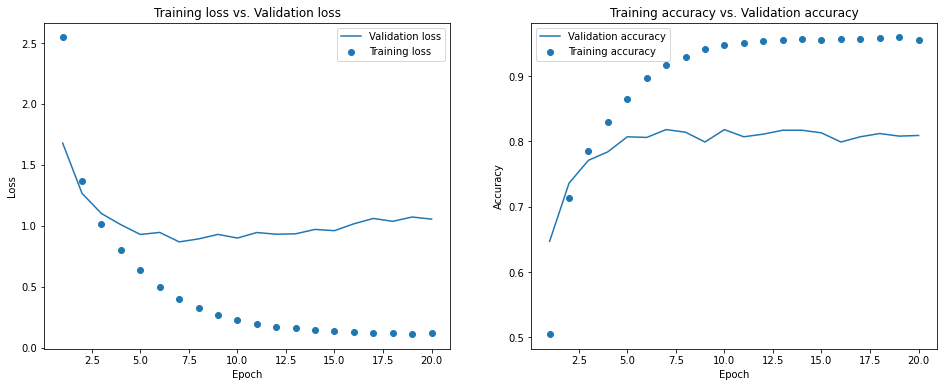

In [18]:
# Plotting loss and accuracy of training data and validation data, respectively
history_dict = history.history
fig, axs = plt.subplots(1,2,figsize=(16,6))
epochs = np.arange(1, 21, 1)
accuracies = history_dict['accuracy']
losses = history_dict['loss']
val_accuracies = history_dict['val_accuracy']
val_losses = history_dict['val_loss']
axs[0].scatter(epochs, losses, label='Training loss')
axs[0].plot(epochs, val_losses, label='Validation loss')
axs[0].set_title('Training loss vs. Validation loss')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].legend()
axs[1].scatter(epochs, accuracies, label='Training accuracy')
axs[1].plot(epochs, val_accuracies, label='Validation accuracy')
axs[1].set_title('Training accuracy vs. Validation accuracy')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy')
axs[1].legend()
fig.show()

In [20]:
# Overfitting seems to have happend since the 7th epoch
# Train a model with 7 epochs
history = model.fit(partial_x_train, partial_y_train, epochs=7, batch_size=512,
                    validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)
print(results)

Epoch 1/7
16/16 [==============================] - 0s 26ms/step - loss: 0.0957 - accuracy: 0.9578 - val_loss: 1.2660 - val_accuracy: 0.7910
Epoch 2/7
16/16 [==============================] - 0s 18ms/step - loss: 0.0960 - accuracy: 0.9579 - val_loss: 1.1691 - val_accuracy: 0.8030
Epoch 3/7
16/16 [==============================] - 0s 18ms/step - loss: 0.0941 - accuracy: 0.9577 - val_loss: 1.2740 - val_accuracy: 0.7870
Epoch 4/7
16/16 [==============================] - 0s 18ms/step - loss: 0.0966 - accuracy: 0.9583 - val_loss: 1.2245 - val_accuracy: 0.8010
Epoch 5/7
16/16 [==============================] - 0s 20ms/step - loss: 0.0905 - accuracy: 0.9585 - val_loss: 1.2461 - val_accuracy: 0.7870
Epoch 6/7
16/16 [==============================] - 0s 18ms/step - loss: 0.0928 - accuracy: 0.9592 - val_loss: 1.2983 - val_accuracy: 0.7920
Epoch 7/7
71/71 [==============================] - 0s 4ms/step - loss: 1.4467 - accuracy: 0.7765
[1.4467322826385498, 0.7764915227890015]


In [21]:
# Compare with pure random prediction
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
print(hits_array.mean())

0.19456812110418523


In [22]:
# Generating predictions on new data
predictions = model.predict(x_test)
np.argmax(predictions[0])

3

In [23]:
# Regression example
# Loading the Boston housing dataset
from tensorflow.keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = (boston_housing.load_data())
print(train_data.shape)
print(test_data.shape)

65536/57026 [==================================] - 0s 0us/step
(404, 13)
(102, 13)


In [24]:
# Preparing the data - scale the numerical features
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /=std

In [25]:
# Model definition
def build_model():
  model = keras.Sequential(
      [layers.Dense(64, activation="relu"),
       layers.Dense(64, activation="relu"),
       layers.Dense(1)]
  )
  model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
  return model

In [27]:
# K-fold cross validation
k = 4
num_val_samples = len(train_data)//k
num_epochs = 100
all_scores = []
for i in range(k):
  print(f"Processing fold #{i}")
  val_data = train_data[i*num_val_samples: (i+1)*num_val_samples]
  val_targets = train_targets[i*num_val_samples: (i+1)*num_val_samples]
  partial_train_data = np.concatenate(
      [train_data[:i*num_val_samples],
       train_data[(i+1)*num_val_samples:]],
       axis=0
  )
  partial_train_targets = np.concatenate(
      [train_targets[:i*num_val_samples],
       train_targets[(i+1)*num_val_samples:]],
       axis=0
  )
  model = build_model()
  model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, 
            batch_size=16, verbose=0)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores.append(val_mae)

print(all_scores)
print(np.mean(all_scores))

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3
[1.9050718545913696, 2.426849365234375, 2.4726808071136475, 2.473043203353882]
2.3194113075733185


Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


<function matplotlib.pyplot.show>

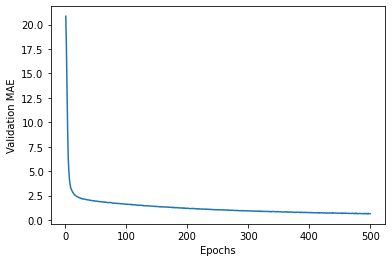

In [30]:
# Re-train model with more epochs
num_epochs = 500
all_mae_histories = []
for i in range(k):
  print(f"Processing fold #{i}")
  val_data = train_data[i*num_val_samples: (i+1)*num_val_samples]
  val_targets = train_targets[i*num_val_samples: (i+1)*num_val_samples]
  partial_train_data = np.concatenate(
      [train_data[:i*num_val_samples],
       train_data[(i+1)*num_val_samples:]],
       axis=0
  )
  partial_train_targets = np.concatenate(
      [train_targets[:i*num_val_samples],
       train_targets[(i+1)*num_val_samples:]],
       axis=0
  )
  model = build_model()
  history = model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, 
            batch_size=16, verbose=0)
  mae_history = history.history["mae"]
  all_mae_histories.append(mae_history)

average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

plt.plot(range(1, len(average_mae_history)+1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show